In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

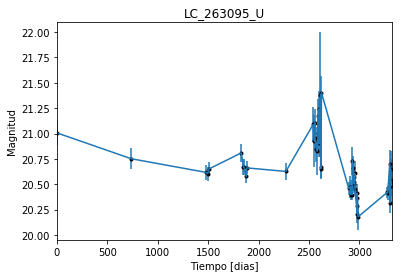

In [2]:
data = np.genfromtxt('LC_263095_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_263095_U')
plt.savefig("LC_263095_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

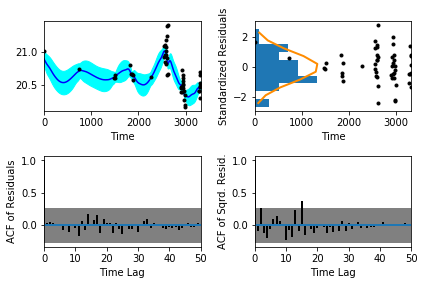

In [5]:
sample.assess_fit()

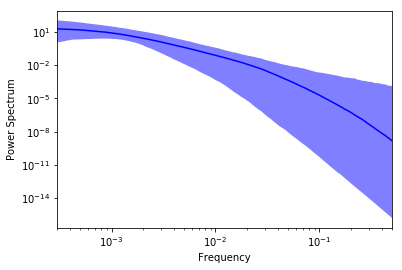

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

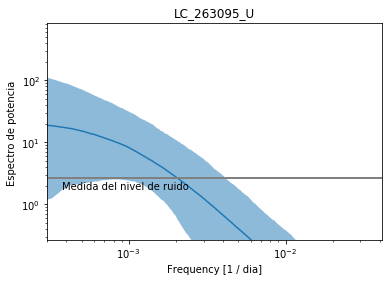

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_263095_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_263095_U')

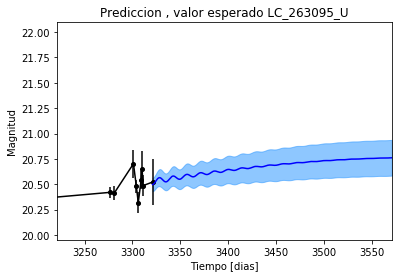

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_263095_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_263095_U')

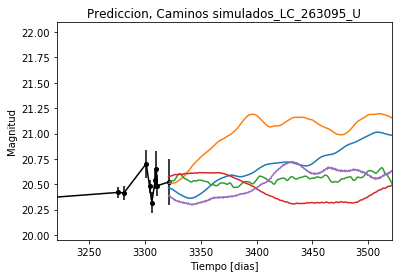

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_263095_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


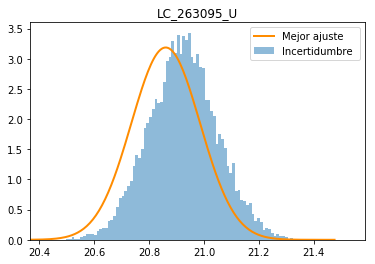

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_263095_U')
plt.savefig("Mejor_ajuste_LC_263095_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_263095_U')

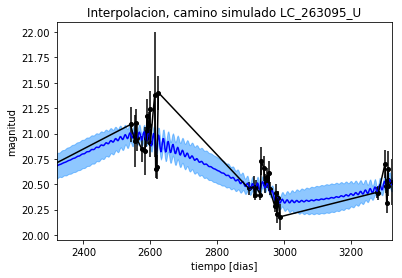

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_263095_U')

Text(0.5,1,'Interpolacion, camino simulado LC_263095_U')

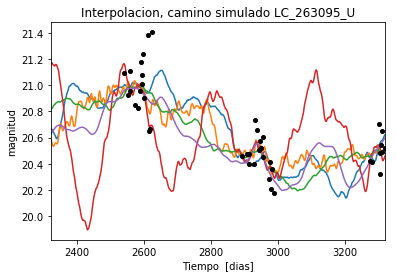

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_263095_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 671.727649776
Median: 0.0204190505135
Standard deviation: 0.208225256091
68% credibility interval: [ 0.0012802   0.24519047]
95% credibility interval: [  3.68496988e-04   8.08589067e-01]
99% credibility interval: [  3.15446635e-04   9.43673837e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 401.324233825
Median: 0.00570387792738
Standard deviation: 0.0980564667109
68% credibility interval: [ 0.00061411  0.06092412]
95% credibility interval: [  3.36723487e-04   3.50123493e-01]
99% credibility interval: [  3.10283931e-04   6.48346303e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 544.616690153
Median: 0.0494409158965

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 940.598770028
Median: 44.0422969367
Standard deviation: 1.66400871538
68% credibility interval: [ 42.14810148  45.31131313]
95% credibility interval: [ 39.64841589  45.98337365]
99% credibility interval: [ 37.87647799  46.54041587]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 637.311942321
Median: 1.17295705266
Standard deviation: 2.41024793855
68% credibility interval: [ 0.12794905  4.95034853]
95% credibility interval: [ 0.02181854  8.19553782]
99% credibility interval: [  0.011467    10.36260156]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 431.855972587
Median: 1.51233143734
Standard deviation: 10.2820872039
68% credibility interval: [  0.06156575  13.7101553 ]
95% credibility interval: [  3.34241281e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.1335769
Median: 6.52278502496e-30
Standard deviation: 7.98741292727e+90
68% credibility interval: [  1.28369659e-97   4.65726868e-02]
95% credibility interval: [  3.34297717e-115   8.90595982e+077]
99% credibility interval: [  1.68211506e-134   8.75798879e+084]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2539.67158204
Median: 20.6712046399
Standard deviation: 0.111612846883
68% credibility interval: [ 20.58176532  20.77101647]
95% credibility interval: [ 20.4635708  20.9175343]
99% credibility interval: [ 20.35234531  21.04794771]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 332.984717452
Median: 0.0322904512711
Standard deviation: 0.270629610711
68% credibility interval: [ 0.          0.48821469]
95% credibility interval: [ 0.          0.90735982]
99% credibility interval: [ 0.          0.98914767]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 332.984717452
Median: 0.0322904512711
Standard deviation: 0.270629610711
68% credibility interval: [ 0.          0.48821469]
95% credibility interval: [ 0.          0.90735982]
99% credibility interval: [ 0.          0.98914767]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1294.26332777
Median: 0.0
Standard deviation: 0.000595148746529
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 940.598770028
Median: 44.0422969367
Standard deviation: 1.66400871538
68% credibility interval: [ 42.14810148  45.31131313]
95% credibility interval: [ 39.64841589  45.98337365]
99% credibility interval: [ 37.87647799  46.54041587]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1687.89336131
Median: 0.0542562422797
Standard deviation: 0.0568279722959
68% credibility interval: [ 0.03205471  0.10107329]
95% credibility interval: [ 0.01930059  0.20966814]
99% credibility interval: [ 0.01426286  0.34000189]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 810.194999852
Median: 1.16919265053
Standard deviation: 0.191901465541
68% credibility interval: [ 0.9942315  1.3712785]
95% credibility interval: [ 0.86235025  1.6102386 ]
99% credibility interval: [ 0.77890748  1.76329531]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 616.238523999
Median: 0.00152913270517
Standard deviation: 0.477881260427
68% credibility interval: [  3.48723343e-06   7.21888246e-02]
95% credibility interval: [  7.03516541e-80   1.20828295e+00]
99% credibility interval: [  7.22770633e-89   3.47886743e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 671.727649776
Median: (-0.128296678173-0.441709874754j)
Standard deviation: 2.14548600548
68% credibility interval: [-1.54057717-0.91335701j -0.00804375-4.92073228j]
95% credibility interval: [ -5.08051494e+00+0.j          -2.31533486e-03-0.59840622j]
99% credibility interval: [ -5.92927759e+00-4.85385093j  -1.98200966e-03-0.08634507j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 401.324233825
Median: (-0.0358385219873+3.60736143136j)
Standard deviation: 1.80859125471
68% credibility interval: [-0.38279755+0.28163369j -0.00385855+0.06830703j]
95% credibility interval: [ -2.19989079e+00+0.03343045j  -2.11569607e-03+1.07493663j]
99% credibility interval: [ -4.07367997e+00+5.46865246j  -1.94957143e-03+0.00587804j]
Post